# Исследование компьютерных игр

## Вывод и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В колонке "год выпуска' нужно изменить тип данных на int. Колонка user_score нужно изменить тип данных на float.


Данные за 2016 год могут быть неполными.

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных

### Заменим названия столбцов, переведем в нижний регистр  

In [5]:
games.columns = games.columns.str.lower() 

In [6]:
games.columns  # проверим

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Проверим данные на пропуски и изменим данные на нужные типы, если нужно

#### Проверим столбец 'year_of_release'

В колонке 'year_of_release' есть пропуски, удалим, т.к. их немного и заполнить их нельзя.  И затем изменим тип данных на int

In [7]:
games = games.dropna(subset=['year_of_release'])

In [8]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [10]:
games['year_of_release'].unique() # проверим

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

#### Проверим столбец User_score

In [11]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [12]:
games.query('user_score == "tbd"') # есть символ tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd = 'to be determined' или 'to be decided', означает 'Будет определено' или 'Будет решено', т.е. oценка пользователей не определена. По смыслу это аббревиатура является пропуском, или NaN. Можно tbd заменить NAN.

In [13]:
games['user_score'] = games['user_score'].replace('tbd',np.NaN).astype(float)

In [14]:
games['user_score'].unique() # заменили на nan и проверим

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

#### Проверим колонку rating

In [15]:
games['rating'].value_counts() # проверим значения и количество

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Entertainment Software Rating Board (ESRB) — организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
Принятая градация возрастных категорий 
- E   -    «E» («Everyone») — «Для всех»
- T   -    «T» («Teen») — «Подросткам»
- M   -    «M» («Mature») — «Для взрослых»
- E10+ -   «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- EC   -   «EC» («Early childhood») — «Для детей младшего возраста»   
- K-A  -   "K-A" ("Kids to Adults")
- RP   -   «RP» («Rating Pending») — «Рейтинг ожидается»   
- AO   -   «AO» («Adults Only 18+») — «Только для взрослых»

Последние 3 категории из старого рейтинга, заменим их на новые. А пропуски пометим как 'нет рейтинга'.

In [16]:
games['rating'] = games['rating'].replace('AO','M')
games['rating'] = games['rating'].replace('K-A','E')
games['rating'] = games['rating'].replace('EC','E10+')

In [17]:
games['rating'] = games['rating'].replace('RP','нет рейтинга')
games['rating'] = games['rating'].replace(np.NaN,'нет рейтинга')

In [18]:
games['rating'].value_counts() # проверим значения и количество

нет рейтинга    6679
E               3924
T               2905
M               1537
E10+            1401
Name: rating, dtype: int64

In [19]:
games.loc[games['name'].isnull()] # посмотрим также на пропуски в name и genre

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,нет рейтинга
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,нет рейтинга


In [20]:
games = games.dropna(subset=['name']) # удалим два строки с пропусками в имени и жанре

### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [21]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [22]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,нет рейтинга,31.38


## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы 

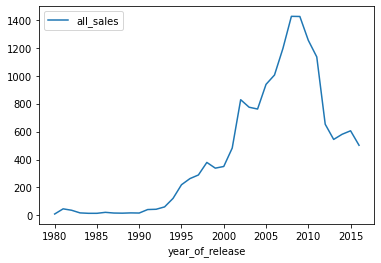

In [23]:
games.pivot_table(index='year_of_release', values='all_sales', aggfunc='count').plot();

Возьмем на заметку, что период после 2000 года, это когда начался рост продаж и рост популярности компьютерных игр. Интересно, что начиная с 2009 начался общий спад продаж игр на платформах, видимо в игру вступили смартфоны.

Посмотрим, как менялись годовые продажи по платформам

In [24]:
(games
 .query('year_of_release >= 2005')
 .pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value=0, margins=True))
# сделаем срез с 2005 года и сведем в сводную данные по платформам

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,
3DS,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14,257.81
DC,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06
DS,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,785.49
GBA,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.54
GC,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39.15
PC,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,167.79
PS2,160.66,103.42,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,426.46
PS3,0.00,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
PS4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14


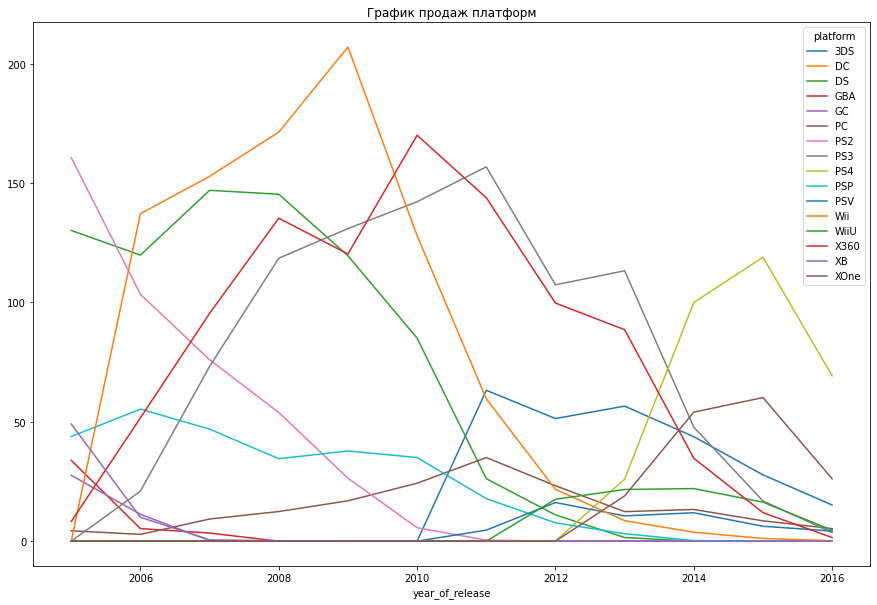

In [25]:
(games
 .query('year_of_release >= 2005')
 .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum', fill_value=0)
 .plot(figsize=(15,10)))
plt.title('График продаж платформ');

В мире компьютерных игр существуют стадии жизни: появления, рост, пик, спад популярности и "уход из жизни".
Есть платформы, которые за 10-15 лет прошли все стадии. В среднем платформа живет около 10 лет.

Посмотрим только платформы, по которым есть продажи за последний год, 2016 и предпоследние 2013-2015. Иначе нет смысла смотреть на то, что уже ушло с рынка.

### Актуальные продажи

In [26]:
(games
 .query('year_of_release >=2013')
 .pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value=0, margins=True)
 .sort_values('All',ascending=False))

year_of_release,2013,2014,2015,2016,All
platform,,,,,
All,361.24,331.53,267.98,129.94,1090.69
PS4,25.99,100.00,118.90,69.25,314.14
PS3,113.25,47.76,16.82,3.60,181.43
XOne,18.96,54.07,60.14,26.15,159.32
3DS,56.57,43.76,27.78,15.14,143.25
X360,88.58,34.74,11.96,1.52,136.80
WiiU,21.65,22.03,16.35,4.60,64.63
PC,12.38,13.28,8.52,5.25,39.43
PSV,10.59,11.90,6.25,4.25,32.99


На первых двух местах по продажам за 4 года - 2 платформы из семейства Playstation, PS4 и PS3. Далее XOne. Затем 3DS от Nintendo. И снова от Microsoft X360.
Все платформы имеют падающий тренд, игры на сотовых телефонах окончательно перехватили инициативу.

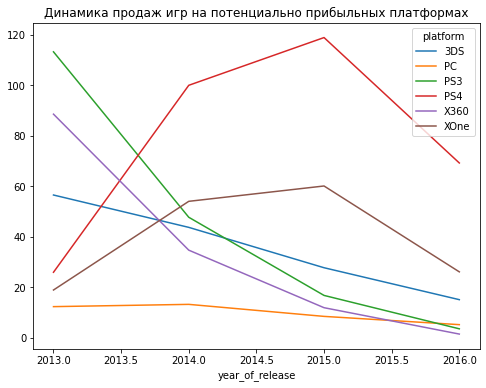

In [27]:
(games
 .query('year_of_release >= 2013 & platform in ["PS4", "PS3", "XOne", "3DS", "PC", "X360"]')
 .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum', fill_value=0)
 .plot(figsize=(8,6)));
plt.title('Динамика продаж игр на потенциально прибыльных платформах');

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [28]:
games_2013 = games.query('year_of_release >= 2013')
# создадим переменную-срез с 2013 года 

In [29]:
(games.query('year_of_release >= 2013')
.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value=0, margins=True))

year_of_release,2013,2014,2015,2016,All
platform,,,,,
3DS,56.57,43.76,27.78,15.14,143.25
DS,1.54,0.00,0.00,0.00,1.54
PC,12.38,13.28,8.52,5.25,39.43
PS3,113.25,47.76,16.82,3.60,181.43
PS4,25.99,100.00,118.90,69.25,314.14
PSP,3.14,0.24,0.12,0.00,3.50
PSV,10.59,11.90,6.25,4.25,32.99
Wii,8.59,3.75,1.14,0.18,13.66
WiiU,21.65,22.03,16.35,4.60,64.63


In [30]:
games_2013.groupby('platform')['all_sales'].describe().sort_values('count',ascending=False)
#постотрим на Дискрайб по платформам

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24


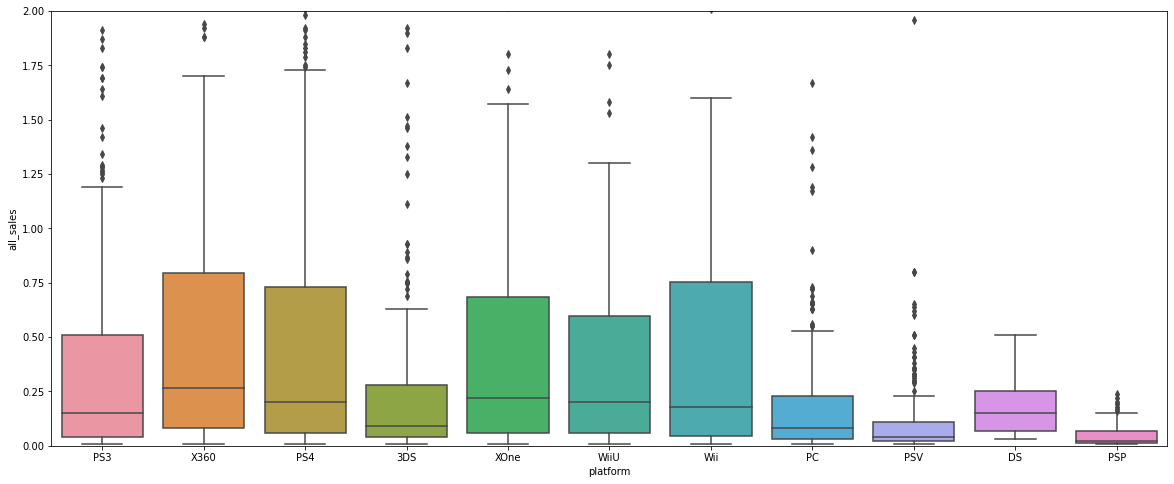

In [31]:
plt.figure(figsize=(20, 8))
sns.boxplot(data = games_2013, x = 'platform', y = 'all_sales')
plt.ylim(0, 2)
plt.show()

Построили 'ящики с усами' по платформам и для сопоставления Дискрайб.
- Ящики по платформам приблизительно начинаются на одном уровне, т.е. значение продаж нижнего квартиля начинаются на одних уровнях. 
- Верхний квартиль прибл. на уровне значения 0,75 млн проданных игр у PS4, X360, XOne, Wii.
- Количество продаж между нижним и верхним квартилями находится на одних уровнях у самых популярных платформ. 
- Присутствуют выбросы - редкие значения количесто продаж. Выбросы есть на всех платформах.

Можно сказать, что распределение значений продаж по всем миру и по всем платформах приблизительно однородно. Это говорит о популярности и одинаковых трендах в индустрии компьютерных играх по всему миру. Падающий тренд продаж по всем игровым платформам, также говорит о однородности в мире компьютерных игр. 


### Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков. Диаграмма рассеяния и  корреляция между отзывами и продажами.

In [32]:
games_2013.pivot_table(index='platform', values=['critic_score', 'user_score'], aggfunc='mean', margins=True)

,critic_score,user_score
platform,,
3DS,68.338028,6.976250
DS,NaN,4.800000
PC,75.550336,6.269677
PS3,70.198347,6.348387
PS4,72.091270,6.748249
PSP,74.000000,5.850000
PSV,71.636364,7.527273
Wii,NaN,5.257143
WiiU,71.642857,7.017500


В сводной таблице вывели средний балл по каждой платформе, средняя оценка критиками и средняя оценка, выставленная пользователями.

Пользовательские оценки и оценки критиков не влияют на продажи. Это видно по средним баллам, нет сильных отклонений среднего по платформе от средних оценок других платформ, и от общей средней.
Например, PS4 лидер продаж (30%) имеет средний балл 72 и 6,74 (критик и пользователь, соответственно). А общий средний балл 72,2 и 6,73.
Или XOne на втором месте по популярности в 2016 году, средний балл также неотличается от общего среднего балла.

Посмотрим, что покажет диаграмма рассеивания.

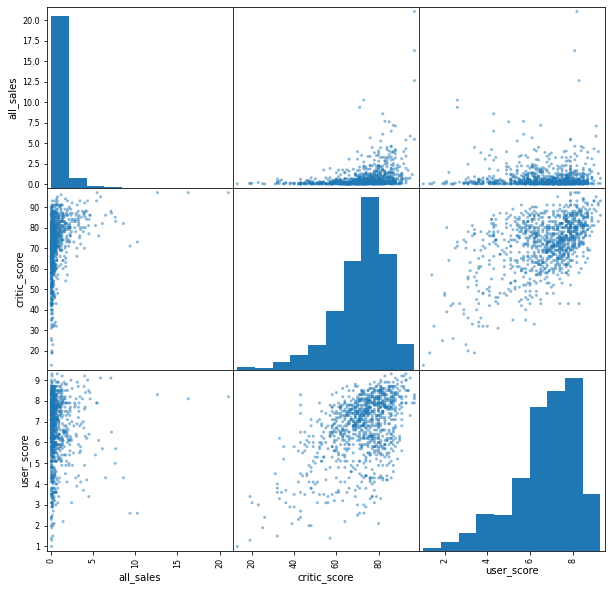

In [33]:
#выделим одну самую популярную платформу PS4
ps4_games = games_2013.query('platform == "PS4"' and 'critic_score > 0')
scatter_matrix(ps4_games[['all_sales', 'critic_score', 'user_score']], figsize = (10, 10))
#scatter_matrix(games_2013[['all_sales', 'critic_score', 'user_score']], figsize = (10, 10))
plt.show()

Диаграммы рассеивания показывают, что есть зависимость all_sales от critic_score и all_sales от user_score. Имеется много выбросов, где с увеличением продажи выше оценка пользователей и критиков, но выбросов не так и много, и большая часть продаж "стелется" вдоль оси х, т.е. с увеличение оценки критиков и пользователей продажи в большинстве случаев растут не значительно.

Анализ по средним также это показал, где самые популярные платформы имеют среднюю оценку.

Проверим коэффициент корреляции по всем платформам

In [34]:
games_2013_corr = games_2013.pivot_table(index='platform', values=['all_sales', 'critic_score', 'user_score'])
print(games_2013_corr.corr())

              all_sales  critic_score  user_score
all_sales      1.000000     -0.447537    0.093242
critic_score  -0.447537      1.000000   -0.255460
user_score     0.093242     -0.255460    1.000000


Коэффициент корреляции:

Оценка пользователей имеет очень слабую зависимость от продаж (0.09).

Оценка критиков имеет обратную среднюю зависимость (-0.44).

"Обратность" можно объяснить тем, что критики выставили высокие оценки новым играм на этапе выхода на рынок, и благодаря им игры успешно вышли на рынок, а геймеры в последствии не оценили продукт и продажи могли быть уже не такими высокими, как на входе на рынок. 

<AxesSubplot:>

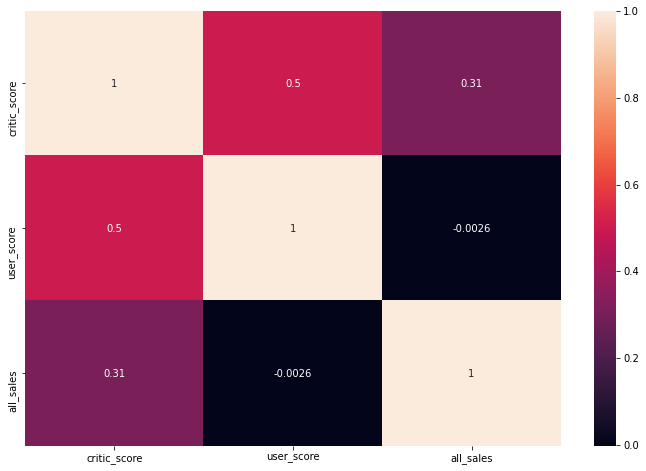

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(games_2013[['platform','critic_score', 'user_score', 'all_sales']].corr(), annot=True)

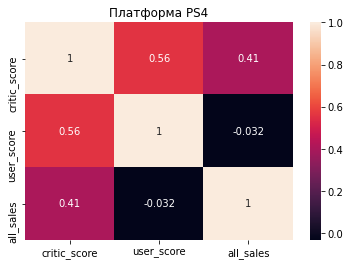

<Figure size 864x576 with 0 Axes>

In [36]:
ps4_games = games_2013.query('platform == "PS4"') 
sns.heatmap(ps4_games[['platform','critic_score', 'user_score', 'all_sales']].corr(), annot=True)
plt.title('Платформа PS4')
plt.figure(figsize=(12,8));

<Figure size 864x576 with 0 Axes>

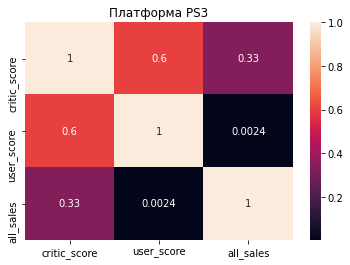

<Figure size 864x576 with 0 Axes>

In [37]:
ps3_games = games_2013.query('platform == "PS3"')
sns.heatmap(ps3_games[['platform','critic_score', 'user_score', 'all_sales']].corr(), annot=True)
plt.title('Платформа PS3')
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

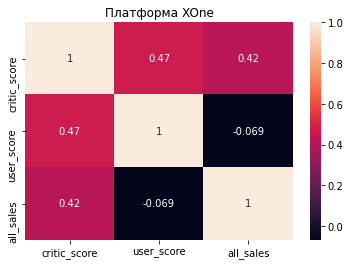

<Figure size 864x576 with 0 Axes>

In [38]:
xone_games = games_2013.query('platform == "XOne"')
sns.heatmap(xone_games[['platform','critic_score', 'user_score', 'all_sales']].corr(), annot=True)
plt.title('Платформа XOne')
plt.figure(figsize=(12,8))

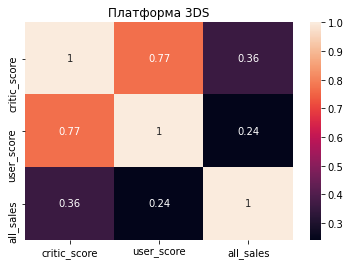

<Figure size 864x576 with 0 Axes>

In [39]:
ds3_games = games_2013.query('platform == "3DS"')
sns.heatmap(ds3_games[['platform','critic_score', 'user_score', 'all_sales']].corr(), annot=True)
plt.title('Платформа 3DS')
plt.figure(figsize=(12,8));

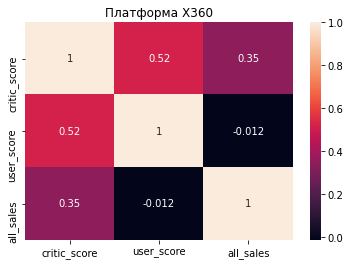

<Figure size 864x576 with 0 Axes>

In [40]:
x360_games = games_2013.query('platform == "X360"')
sns.heatmap(x360_games[['platform','critic_score', 'user_score', 'all_sales']].corr(), annot=True)
plt.title('Платформа X360')
plt.figure(figsize=(12,8));

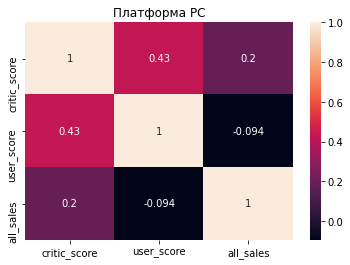

<Figure size 864x576 with 0 Axes>

In [41]:
pc_games = games_2013.query('platform == "PC"') 
sns.heatmap(pc_games[['platform','critic_score', 'user_score', 'all_sales']].corr(), annot=True)
plt.title('Платформа PC')
plt.figure(figsize=(12,8));

### Распределение игр по жанрам

In [42]:
games_2013.pivot_table(index='genre', values='all_sales').sort_values('all_sales', ascending=False)
#games_2013.pivot_table(index='genre', columns ='year_of_release', values='all_sales', aggfunc=['sum', 'mean'], margins=True)#.sort_values('All_mean', ascending=False)
#ding=False)
#columns= values='all_sales', aggfunc=['sum', 'median'])#.sort_values(by='mean', ascending=False)
#sort_values('count',ascending=False)
#columns='year_of_release'

,all_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


- Стабильный лидер по жанрам - Shooter. На втором месте Sports, далее Platform, ролевые игры и гонки.
- Не популярные жанры игр - Puzzle и Strategy и Adventure. 
 

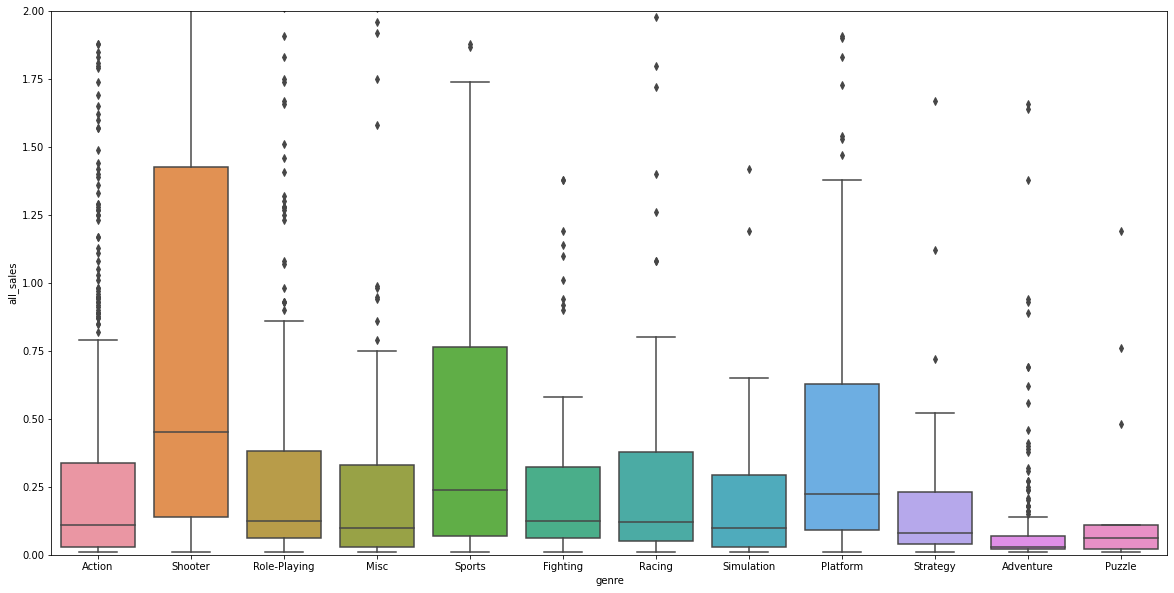

In [43]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = games_2013, x = 'genre', y = 'all_sales')
plt.ylim(0, 2,5)
plt.show()

## Портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5) 


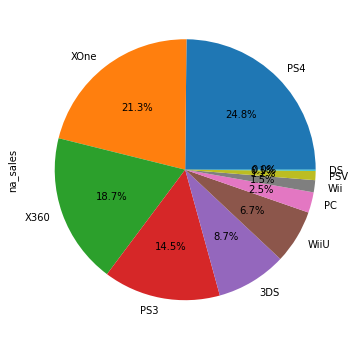

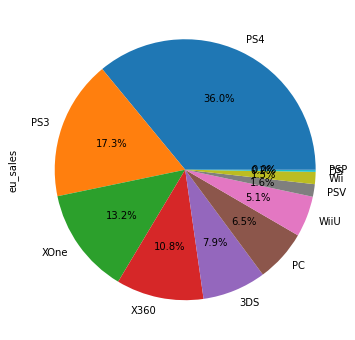

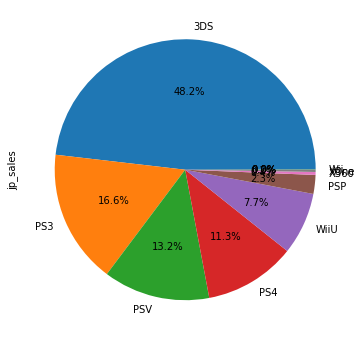

In [44]:
(games_2013
 .pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values('na_sales', ascending=False)
 .plot(kind='pie', y='na_sales', figsize=(6, 6), autopct='%1.1f%%', legend=False));
(games_2013
 .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values('eu_sales', ascending=False)
 .plot(kind='pie', y='eu_sales', figsize=(6, 6), autopct='%1.1f%%', legend=False));
(games_2013
 .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values('jp_sales', ascending=False)
 .plot(kind='pie', y='jp_sales', figsize=(6, 6), autopct='%1.1f%%', legend=False));

Самые популярные платформы в регионах: 
- пятерка популярных, в регионах Северная Америка и Европа, выглядит одинакова (PS4, PS3, XOne, X360, 3DS), лидерство у платформ PlayStation
- в Японии лидер платформа 3DS от Nintendo (доля почти 50%) и на вторых ролях платформы от PlayStation
- в мире три популярных производителя игровых приставок, платформы от SONYPlayStation, Microsoft и Nintendo. Их доли от региона могут отличаться

### Самые популярные жанры (топ-5)

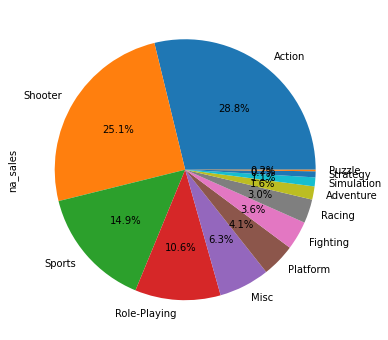

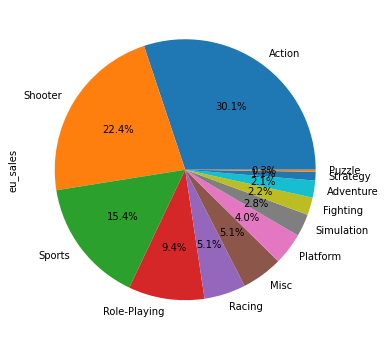

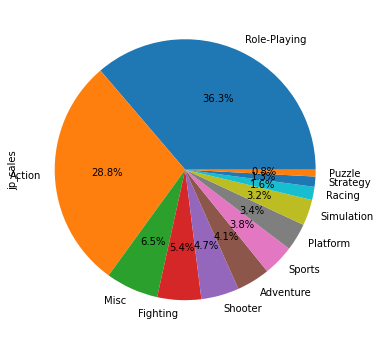

In [45]:
(games_2013
 .pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values('na_sales', ascending=False)
 .plot(kind='pie', y='na_sales', figsize=(6, 6), autopct='%1.1f%%', legend=False));
(games_2013
 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values('eu_sales', ascending=False)
 .plot(kind='pie', y='eu_sales', figsize=(6, 6), autopct='%1.1f%%', legend=False));
(games_2013
 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values('jp_sales', ascending=False)
 .plot(kind='pie', y='jp_sales', figsize=(6, 6), autopct='%1.1f%%', legend=False));

Самые популяпные жанры:
- пятерка жанров в Северной Америке и Европе похожи. Процентные доли жанров отличаются на несколько процентов.
- есть отличие в Северной Америке и Европе по пятой позиции в ТОПе. В Северной Америке это жанр MISC, в европе это Racing.
- предпочтения японцев отличаются от Европы и Америки. В Японии предпочитают играть в ролевые игры и на втором месте Action.


### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

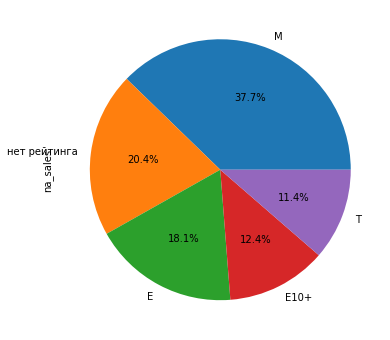

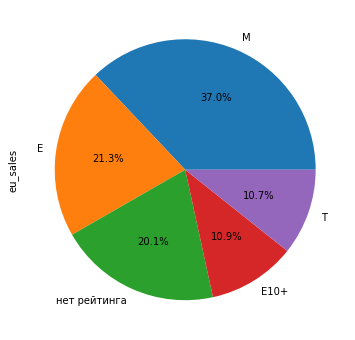

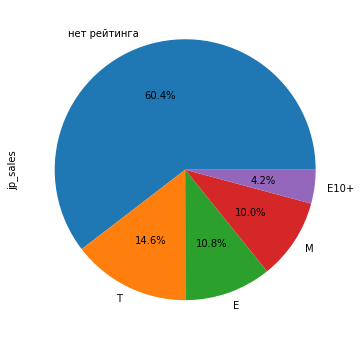

In [46]:
(games_2013
 .pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values('na_sales', ascending=False)
 .plot(kind='pie', y='na_sales', figsize=(6, 6), autopct='%1.1f%%', legend=False));
(games_2013
 .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values('eu_sales', ascending=False)
 .plot(kind='pie', y='eu_sales', figsize=(6, 6), autopct='%1.1f%%', legend=False));
(games_2013
 .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values('jp_sales', ascending=False)
 .plot(kind='pie', y='jp_sales', figsize=(6, 6), autopct='%1.1f%%', legend=False));

В регионах Северная Америка и Европа доли продаж категорий рейтинга ESRB почти не отличаются и не отличаются занимаемым местам. Приблизительно пятая часть игр без рейтинга. 
- первое место - категория для взрослых
- второе место - для всех
- третье место - для всех от 10 лет и старше
- четвертое место - для подростков


Доля продаж по рейтингам игр в Японии распределены по другому. 60 % игр не присвоен рейтинг.

- первое место - для подростков
- второе место - для всех
- третье место - категория для взрослых
- четвертое место - для всех от 10 лет и старше

Возможно пользуются популярностью игры японского производства, и рейтинг принятый в Северной Америке им не присваивается.


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выделим срезы по платформам 

Проверим различается ли средние рейтинги пользователей с помощью ttest

scipy.stats.ttest_ind - специальный метод, который используется для проверки гипотезы о равенстве среднего двух выборок данных

Нулевая гипотеза - средние рейтинги пользователей двух платформ (Xbox One и PC) равна.

Альтернативная гипотеза - средние рейтинги пользователей двух платформ (Xbox One и PC) не равна.

In [47]:
games_2013_xbox = games_2013.query('platform == "XOne" and user_score > 0')
games_2013_pc = games_2013.query('platform == "PC" and user_score > 0')

#games_2013_xbox = games_2013[(games_2013['platform'] == "XOne") and (games_2013['user_score'] >0)]
#games_2013_pc = games_2013[(games_2013['platform'] == "PC") and (games_2013['user_score'] >0)]

#xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
#pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
#stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

In [48]:
array_1 = games_2013_xbox['user_score']
array_2 = games_2013_pc['user_score']

alpha = .05    #критический уровень статистической значимости, возьмем общепринятое пороговые значения — 5%
 
results = st.ttest_ind(array_1, array_2)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    
   

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вероятность получить равенство средних высоко, поэтому нулевую гипотезу не отвергаем. 
Средние пользовательские рейтинги двух платформ XOne и PC равны.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Выделим срезы по двум жанрам

Нулевая гипотеза - средние рейтинги пользователей по двум жанрам (Action и Sports) равны.

Альтернативная гипотеза - средние рейтинги пользователей по двум жанрам (Action и Sports) не равны.

In [49]:
games_2013_action = games_2013.query('genre == "Action" and user_score > 0')
games_2013_sports = games_2013.query('genre == "Sports" and user_score > 0')

In [50]:
array_3 = games_2013_action['user_score']
array_4 = games_2013_sports['user_score']

alpha = .05    #критический уровень статистической значимости, возьмем общепринятое пороговые значения — 5%
 
results = st.ttest_ind(array_3, array_4)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги двух жанров не равны.

## Вывод


В мире интерес к компьютерным играм на платформах постепенно снижается, тренд на снижение начался в 2009 г. В мире существует три популярных производителя игровых приставок, платформы от SonyPlayStation, Microsoft и Nintendo. Их доли от региона отличаются.

Интересно сейчас посмотреть на тенденции и сделать анализ установленных игр на мобильных телефонах. 

Оценки пользователей и критиков незначительно влияют на продажи. 
- Оценка критиков помогает при появлении новой игры на рынке.
- Оценки пользователей более объективны и зависимость продаж от рейтинга геймеров почти нулевая.

Самые прибыльные жанры игры:
- Стабильный лидер по жанрам - Shooter. 
- На втором месте Sports, далее Platform, ролевые игры и гонки.
- Не популярные жанры игр - Puzzle и Strategy и Adventure.

Рейтинг популярности отличается от региона продаж: 
- пятерка жанров в Северной Америке и Европе: Action, Shooter, Sports, Role-Playing, Racing.
- в Японии на первом месте Role-Playing, далее Action, Misc, Fighting, Shooter
- в Японии высока доля игр без категории рейтинга (60%). В Северной Америке и Европе по рейтингу ESRB популярны игры для взрослых.

Планирование рекламных компаний нужно осуществлять с учетом региональных особенностей рынка компьютерных игр.
- Япония это ставка на игры на платформах Nintendo, а также быть готовым что высока доля игр местного производства (т.е. без рейтинга).
- Северная Америка и Европа это PS4 с играми для взрослых в жанрах Action, Shooter, Sports.
